In [12]:
!pip install polars

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/802.4 kB ? eta -:--:--
   ---------------------------------------- 802.4/802.4 kB 8.7 MB/s eta 0:00:00
   ---------------------------------------- 0.0/44.5 MB ? eta -:--:--
   -- ------------------------------------- 2.9/44.5 MB 13.9 MB/s eta 0:00:03
   ----- ---------------------------------- 6.0/44.5 MB 15.4 MB/s eta 0:00:03
   -------- ------------------------------- 9.2/44.5 MB 15.0 MB/s eta 0:00:03
   ----------- ---------------------------- 12.6/44.5 MB 15.2 MB/s eta 0:00:03
   ------------- -------------------------- 15.2/44.5 MB 14.7 MB/s eta 0:00:02
   ----------------- ---------------------- 19.4/44.5 MB 14.8 MB/s eta 0:00:02
   -------------------- ------------------- 22.5/44.5 MB 14.7 MB/s eta 0:00:02
   ----------------------- ---------------- 26.0/44.5 MB 14.7 MB/s eta 0:00:02
   -------------------------- ------------- 29.1/44.5 MB 14.5 MB/s eta 0

In [13]:
import polars as pl
import pandas as pd  # Still needed for seaborn/matplotlib compatibility
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sys
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

# Add project root to path
project_root = Path().resolve().parent
sys.path.insert(0, str(project_root))

# Set plotting style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

# Configure Polars for better performance
pl.Config.set_fmt_str_lengths(100)  # Display more characters in output
pl.Config.set_tbl_rows(20)  # Show more rows in tables

print("✓ Imports successful!")
print(f"Project root: {project_root}")
print(f"Polars version: {pl.__version__}")
print("\n💡 Using Polars for fast data processing on large datasets!")
print("   Convert to pandas (df_pd = df_polars.to_pandas()) when needed for visualization.")

✓ Imports successful!
Project root: C:\Users\aloag\personal-study\ctr-prediction-system
Polars version: 1.36.1

💡 Using Polars for fast data processing on large datasets!
   Convert to pandas (df_pd = df_polars.to_pandas()) when needed for visualization.


# Exploratory Data Analysis - Avazu Dataset

This notebook performs comprehensive EDA on the processed Avazu CTR prediction dataset.

## Dataset Information
- **Source**: Kaggle Avazu CTR Prediction Competition
- **File**: `data/raw/avazu_processed.parquet`
- **Target**: `clicked` (binary: 0 or 1)


In [14]:
# Load Avazu processed dataset using Polars (much faster!)
filepath = project_root / "data" / "raw" / "avazu_processed.parquet"

print("Loading Avazu processed dataset with Polars...")
print(f"File path: {filepath}")

if not filepath.exists():
    print(f"⚠️  File not found: {filepath}")
    print("\nPlease run the following first:")
    print("  python scripts/download_avazu.py --load --sample-frac 0.1 --output data/raw/avazu_processed.parquet")
else:
    # Load with Polars - much faster and more memory efficient!
    import time
    start_time = time.time()
    
    df = pl.read_parquet(filepath)
    
    load_time = time.time() - start_time
    print(f"✓ Loaded successfully in {load_time:.2f} seconds!")
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.estimated_size('mb'):.2f} MB")
    
    print(f"\nFirst few rows:")
    display(df.head(10))
    
    print(f"\nSchema:")
    print(df.schema)
    
    print(f"\nColumn names ({len(df.columns)}):")
    print(df.columns)
    
    # Show data types summary
    dtype_counts = {}
    for col, dtype in df.schema.items():
        dtype_str = str(dtype)
        dtype_counts[dtype_str] = dtype_counts.get(dtype_str, 0) + 1
    
    print(f"\nData types:")
    for dtype, count in sorted(dtype_counts.items()):
        print(f"  {dtype}: {count}")

Loading Avazu processed dataset with Polars...
File path: C:\Users\aloag\personal-study\ctr-prediction-system\data\raw\avazu_processed.parquet
✓ Loaded successfully in 2.44 seconds!
Shape: (2021448, 32)
Memory usage: 476.35 MB

First few rows:


user_id,ad_id,device,placement,timestamp,hour,day_of_week,is_weekend,date,clicked,id,C1,banner_pos,site_id,site_domain,site_category,app_id,app_domain,app_category,device_id,device_ip,device_model,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
str,str,str,str,datetime[ns],i32,i32,i64,date,i64,f64,i64,i64,str,str,str,str,str,str,str,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64
"""a99f214a_ddd2926e""","""15706""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0000e18,1005,0,"""1fbe01fe""","""f3845767""","""28905ebd""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""ddd2926e""","""44956a24""",1,2,15706,320,50,1722,0,35,-1,79
"""a99f214a_96809ac8""","""15704""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0000e19,1005,0,"""1fbe01fe""","""f3845767""","""28905ebd""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""96809ac8""","""711ee120""",1,0,15704,320,50,1722,0,35,100084,79
"""a99f214a_b3cf8def""","""15704""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0000e19,1005,0,"""1fbe01fe""","""f3845767""","""28905ebd""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""b3cf8def""","""8a4875bd""",1,0,15704,320,50,1722,0,35,100084,79
"""a99f214a_e8275b8f""","""15706""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0001e19,1005,0,"""1fbe01fe""","""f3845767""","""28905ebd""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""e8275b8f""","""6332421a""",1,0,15706,320,50,1722,0,35,100084,79
"""a99f214a_9644d0bf""","""18993""","""desktop""","""sidebar""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0001e19,1005,1,"""fe8cc448""","""9166c161""","""0569f928""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""9644d0bf""","""779d90c2""",1,0,18993,320,50,2161,0,35,-1,157
"""a99f214a_05241af0""","""16920""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0001e19,1005,0,"""d6137915""","""bb1ef334""","""f028772b""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""05241af0""","""8a4875bd""",1,0,16920,320,50,1899,0,431,100077,117
"""a99f214a_b264c159""","""20362""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0001e19,1005,0,"""8fda644b""","""25d4cfcd""","""f028772b""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""b264c159""","""be6db1d7""",1,0,20362,320,50,2333,0,39,-1,157
"""a99f214a_e6f67278""","""20632""","""desktop""","""sidebar""",2014-10-21 00:00:00,0,1,0,2014-10-21,0,1.0001e19,1005,1,"""e151e245""","""7e091613""","""f028772b""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""e6f67278""","""be74e6fe""",1,0,20632,320,50,2374,3,39,-1,23
"""a99f214a_37e8da74""","""15707""","""desktop""","""header""",2014-10-21 00:00:00,0,1,0,2014-10-21,1,1.0001e19,1005,0,"""1fbe01fe""","""f3845767""","""28905ebd""","""ecad2386""","""7801e8d9""","""07d7df22""","""a99f214a""","""37e8da74""","""5db079b5""",1,2,15707,320,50,1722,0,35,-1,79



Schema:
Schema({'user_id': String, 'ad_id': String, 'device': String, 'placement': String, 'timestamp': Datetime(time_unit='ns', time_zone=None), 'hour': Int32, 'day_of_week': Int32, 'is_weekend': Int64, 'date': Date, 'clicked': Int64, 'id': Float64, 'C1': Int64, 'banner_pos': Int64, 'site_id': String, 'site_domain': String, 'site_category': String, 'app_id': String, 'app_domain': String, 'app_category': String, 'device_id': String, 'device_ip': String, 'device_model': String, 'device_type': Int64, 'device_conn_type': Int64, 'C14': Int64, 'C15': Int64, 'C16': Int64, 'C17': Int64, 'C18': Int64, 'C19': Int64, 'C20': Int64, 'C21': Int64})

Column names (32):
['user_id', 'ad_id', 'device', 'placement', 'timestamp', 'hour', 'day_of_week', 'is_weekend', 'date', 'clicked', 'id', 'C1', 'banner_pos', 'site_id', 'site_domain', 'site_category', 'app_id', 'app_domain', 'app_category', 'device_id', 'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14', 'C15', 'C16', 'C17', 'C18', '

In [15]:
## Basic Dataset Information


In [16]:
# Basic information using Polars
if 'df' in locals():
    print("=" * 60)
    print("DATASET BASIC INFORMATION")
    print("=" * 60)
    print(f"Shape: {df.shape}")
    print(f"Rows: {df.height:,}")
    print(f"Columns: {df.width}")
    print(f"Memory usage: {df.estimated_size('mb'):.2f} MB")
    
    # Date range if timestamp exists
    if 'timestamp' in df.columns:
        timestamp_stats = df.select([
            pl.col('timestamp').min().alias('min_timestamp'),
            pl.col('timestamp').max().alias('max_timestamp'),
        ])
        min_ts = timestamp_stats['min_timestamp'][0]
        max_ts = timestamp_stats['max_timestamp'][0]
        
        if min_ts and max_ts:
            span_days = (max_ts - min_ts).days
            print(f"\nDate range:")
            print(f"  Start: {min_ts}")
            print(f"  End: {max_ts}")
            print(f"  Span: {span_days} days")
    
    # Missing values (Polars way)
    missing_stats = df.null_count()
    total_missing = missing_stats.sum_horizontal().item()
    
    print(f"\nMissing values:")
    if total_missing == 0:
        print("  ✓ No missing values!")
    else:
        missing_df = missing_stats.transpose(include_header=True, column_names=['column', 'missing_count'])
        missing_df = missing_df.with_columns([
            (pl.col('missing_count') / df.height * 100).alias('missing_percentage')
        ]).sort('missing_count', descending=True)
        
        print(missing_df.filter(pl.col('missing_count') > 0))


DATASET BASIC INFORMATION
Shape: (2021448, 32)
Rows: 2,021,448
Columns: 32
Memory usage: 476.35 MB

Date range:
  Start: 2014-10-21 00:00:00
  End: 2014-10-21 09:00:00
  Span: 0 days

Missing values:
  ✓ No missing values!


## Class Imbalance Analysis


CLASS IMBALANCE ANALYSIS
shape: (2, 3)
┌─────────┬─────────┬────────────┐
│ clicked ┆ count   ┆ percentage │
│ ---     ┆ ---     ┆ ---        │
│ i64     ┆ u32     ┆ f64        │
╞═════════╪═════════╪════════════╡
│ 0       ┆ 1694707 ┆ 100.0      │
│ 1       ┆ 326741  ┆ 100.0      │
└─────────┴─────────┴────────────┘

Overall CTR: 0.1616 (16.16%)


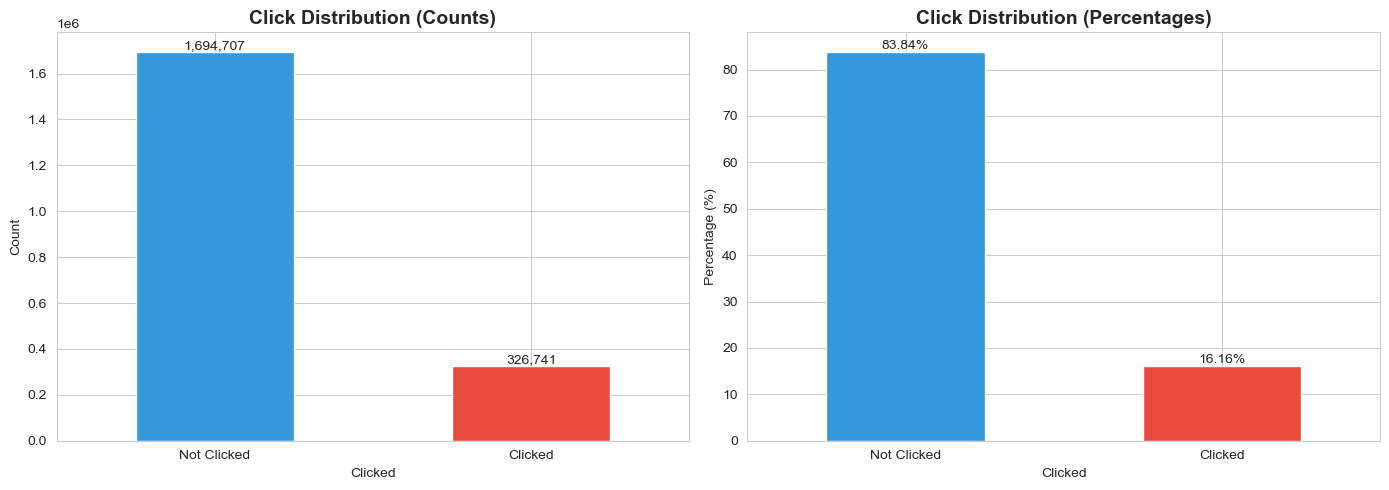

In [17]:
# Class imbalance analysis using Polars
if 'df' in locals() and 'clicked' in df.columns:
    click_stats = df.group_by('clicked').agg([
        pl.count().alias('count'),
        (pl.count() / pl.len() * 100).alias('percentage')
    ]).sort('clicked')
    
    print("=" * 60)
    print("CLASS IMBALANCE ANALYSIS")
    print("=" * 60)
    print(click_stats)
    
    # Overall CTR
    overall_ctr = df['clicked'].mean()
    print(f"\nOverall CTR: {overall_ctr:.4f} ({overall_ctr*100:.2f}%)")
    
    # Convert to pandas for visualization
    df_pd = df.select(['clicked']).to_pandas()
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(14, 5))
    
    # Count plot
    click_counts = df_pd['clicked'].value_counts()
    click_counts.plot(kind='bar', ax=axes[0], color=['#3498db', '#e74c3c'])
    axes[0].set_title('Click Distribution (Counts)', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Clicked')
    axes[0].set_ylabel('Count')
    axes[0].set_xticklabels(['Not Clicked', 'Clicked'], rotation=0)
    for i, v in enumerate(click_counts.values):
        axes[0].text(i, v, f'{v:,}', ha='center', va='bottom')
    
    # Percentage plot
    click_pct = df_pd['clicked'].value_counts(normalize=True) * 100
    click_pct.plot(kind='bar', ax=axes[1], color=['#3498db', '#e74c3c'])
    axes[1].set_title('Click Distribution (Percentages)', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Clicked')
    axes[1].set_ylabel('Percentage (%)')
    axes[1].set_xticklabels(['Not Clicked', 'Clicked'], rotation=0)
    for i, v in enumerate(click_pct.values):
        axes[1].text(i, v, f'{v:.2f}%', ha='center', va='bottom')
    
    plt.tight_layout()
    plt.show()


## Temporal Patterns Analysis


Hourly CTR:
shape: (10, 3)
┌──────┬──────────┬─────────────┐
│ hour ┆ ctr      ┆ impressions │
│ ---  ┆ ---      ┆ ---         │
│ i32  ┆ f64      ┆ u32         │
╞══════╪══════════╪═════════════╡
│ 0    ┆ 0.174714 ┆ 119006      │
│ 1    ┆ 0.173695 ┆ 137442      │
│ 2    ┆ 0.150696 ┆ 207471      │
│ 3    ┆ 0.169791 ┆ 193355      │
│ 4    ┆ 0.151206 ┆ 264711      │
│ 5    ┆ 0.148845 ┆ 273500      │
│ 6    ┆ 0.161259 ┆ 239720      │
│ 7    ┆ 0.169752 ┆ 209311      │
│ 8    ┆ 0.169945 ┆ 207244      │
│ 9    ┆ 0.164054 ┆ 169688      │
└──────┴──────────┴─────────────┘


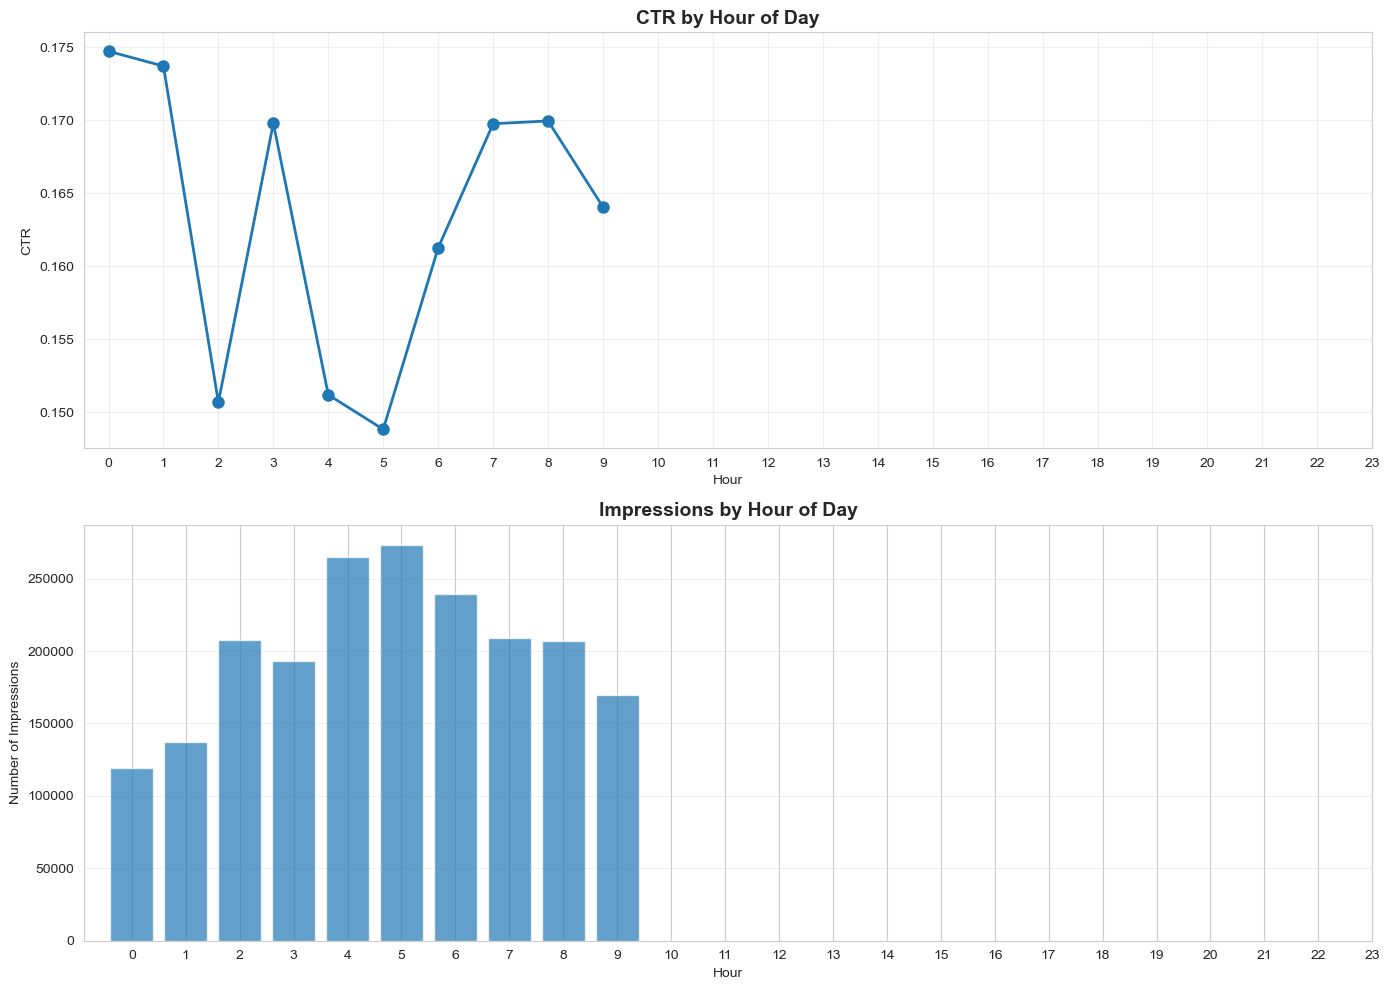


Daily CTR:
  day_name       ctr  impressions
0  Tuesday  0.161637      2021448


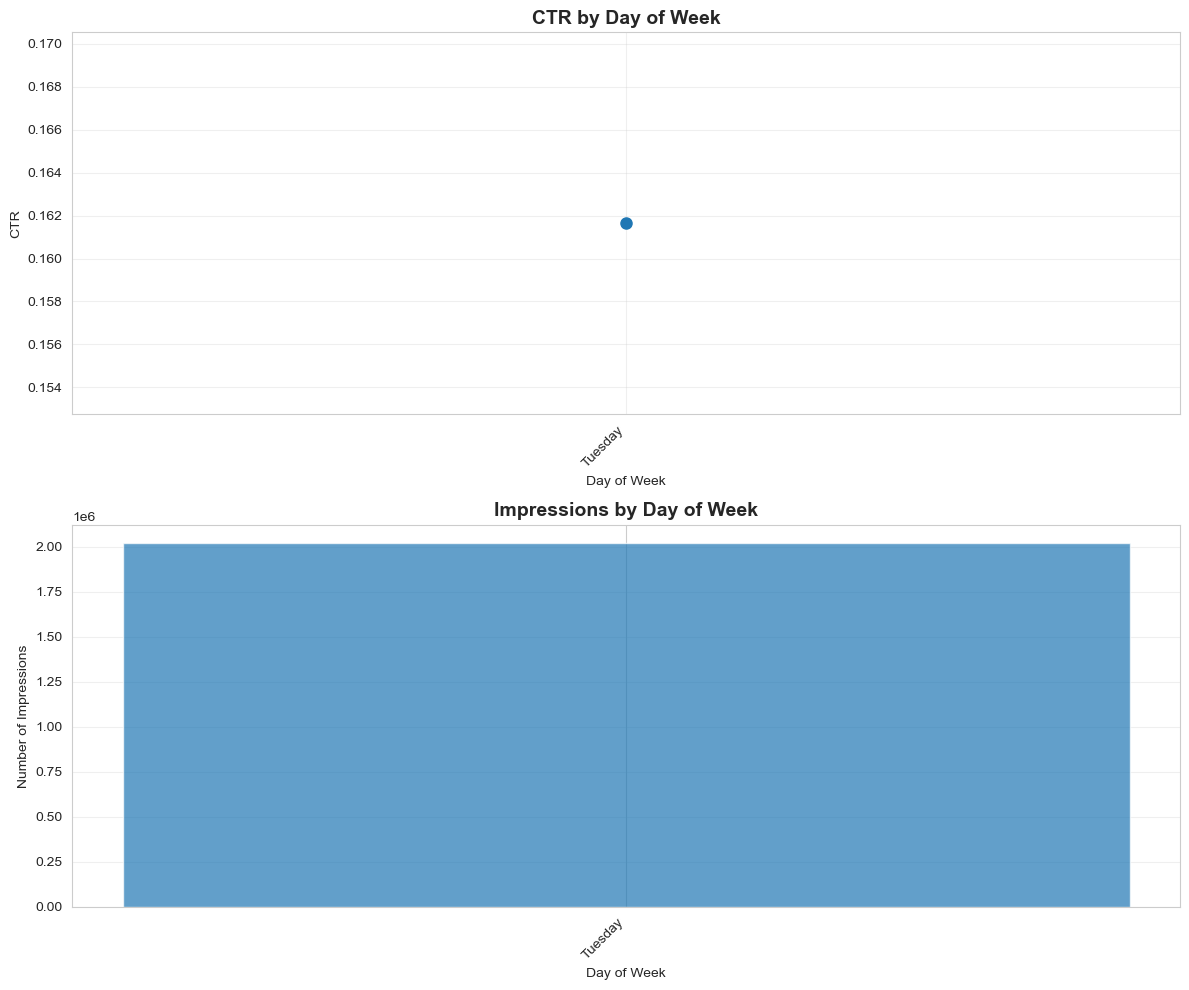

In [18]:
# Temporal patterns using Polars
if 'df' in locals() and 'hour' in df.columns and 'clicked' in df.columns:
    # Hourly CTR
    hourly_ctr = df.group_by('hour').agg([
        pl.col('clicked').mean().alias('ctr'),
        pl.count().alias('impressions')
    ]).sort('hour')
    
    print("Hourly CTR:")
    print(hourly_ctr)
    
    # Convert to pandas for plotting
    hourly_pd = hourly_ctr.to_pandas()
    
    # Plot
    fig, axes = plt.subplots(2, 1, figsize=(14, 10))
    
    # Hourly CTR
    axes[0].plot(hourly_pd['hour'], hourly_pd['ctr'], marker='o', linewidth=2, markersize=8)
    axes[0].set_title('CTR by Hour of Day', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Hour')
    axes[0].set_ylabel('CTR')
    axes[0].grid(True, alpha=0.3)
    axes[0].set_xticks(range(24))
    
    # Hourly impressions
    axes[1].bar(hourly_pd['hour'], hourly_pd['impressions'], alpha=0.7)
    axes[1].set_title('Impressions by Hour of Day', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Hour')
    axes[1].set_ylabel('Number of Impressions')
    axes[1].grid(True, alpha=0.3, axis='y')
    axes[1].set_xticks(range(24))
    
    plt.tight_layout()
    plt.show()
    
    # Day of week analysis
    if 'day_of_week' in df.columns:
        day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        daily_ctr = df.group_by('day_of_week').agg([
            pl.col('clicked').mean().alias('ctr'),
            pl.count().alias('impressions')
        ]).sort('day_of_week')
        
        print("\nDaily CTR:")
        daily_pd = daily_ctr.to_pandas()
        daily_pd['day_name'] = daily_pd['day_of_week'].apply(lambda x: day_names[x])
        print(daily_pd[['day_name', 'ctr', 'impressions']])
        
        # Plot
        fig, axes = plt.subplots(2, 1, figsize=(12, 10))
        
        axes[0].plot(range(len(daily_pd)), daily_pd['ctr'], marker='o', linewidth=2, markersize=8)
        axes[0].set_title('CTR by Day of Week', fontsize=14, fontweight='bold')
        axes[0].set_xlabel('Day of Week')
        axes[0].set_ylabel('CTR')
        axes[0].set_xticks(range(len(daily_pd)))
        axes[0].set_xticklabels(daily_pd['day_name'], rotation=45, ha='right')
        axes[0].grid(True, alpha=0.3)
        
        axes[1].bar(range(len(daily_pd)), daily_pd['impressions'], alpha=0.7)
        axes[1].set_title('Impressions by Day of Week', fontsize=14, fontweight='bold')
        axes[1].set_xlabel('Day of Week')
        axes[1].set_ylabel('Number of Impressions')
        axes[1].set_xticks(range(len(daily_pd)))
        axes[1].set_xticklabels(daily_pd['day_name'], rotation=45, ha='right')
        axes[1].grid(True, alpha=0.3, axis='y')
        
        plt.tight_layout()
        plt.show()


CTR by Device:
shape: (3, 3)
┌─────────┬──────────┬─────────────┐
│ device  ┆ ctr      ┆ impressions │
│ ---     ┆ ---      ┆ ---         │
│ str     ┆ f64      ┆ u32         │
╞═════════╪══════════╪═════════════╡
│ other   ┆ 0.236988 ┆ 79236       │
│ desktop ┆ 0.159641 ┆ 1916104     │
│ tablet  ┆ 0.079439 ┆ 26108       │
└─────────┴──────────┴─────────────┘

CTR by Placement:
shape: (5, 3)
┌────────────┬──────────┬─────────────┐
│ placement  ┆ ctr      ┆ impressions │
│ ---        ┆ ---      ┆ ---         │
│ str        ┆ f64      ┆ u32         │
╞════════════╪══════════╪═════════════╡
│ sidebar    ┆ 0.190911 ┆ 492616      │
│ popup      ┆ 0.174757 ┆ 103         │
│ header     ┆ 0.152239 ┆ 1527713     │
│ footer     ┆ 0.098912 ┆ 1011        │
│ in_content ┆ 0.0      ┆ 5           │
└────────────┴──────────┴─────────────┘

CTR by Device x Placement:
shape: (10, 3)
┌─────────┬────────────┬──────────┐
│ device  ┆ placement  ┆ ctr      │
│ ---     ┆ ---        ┆ ---      │
│ str     ┆ st

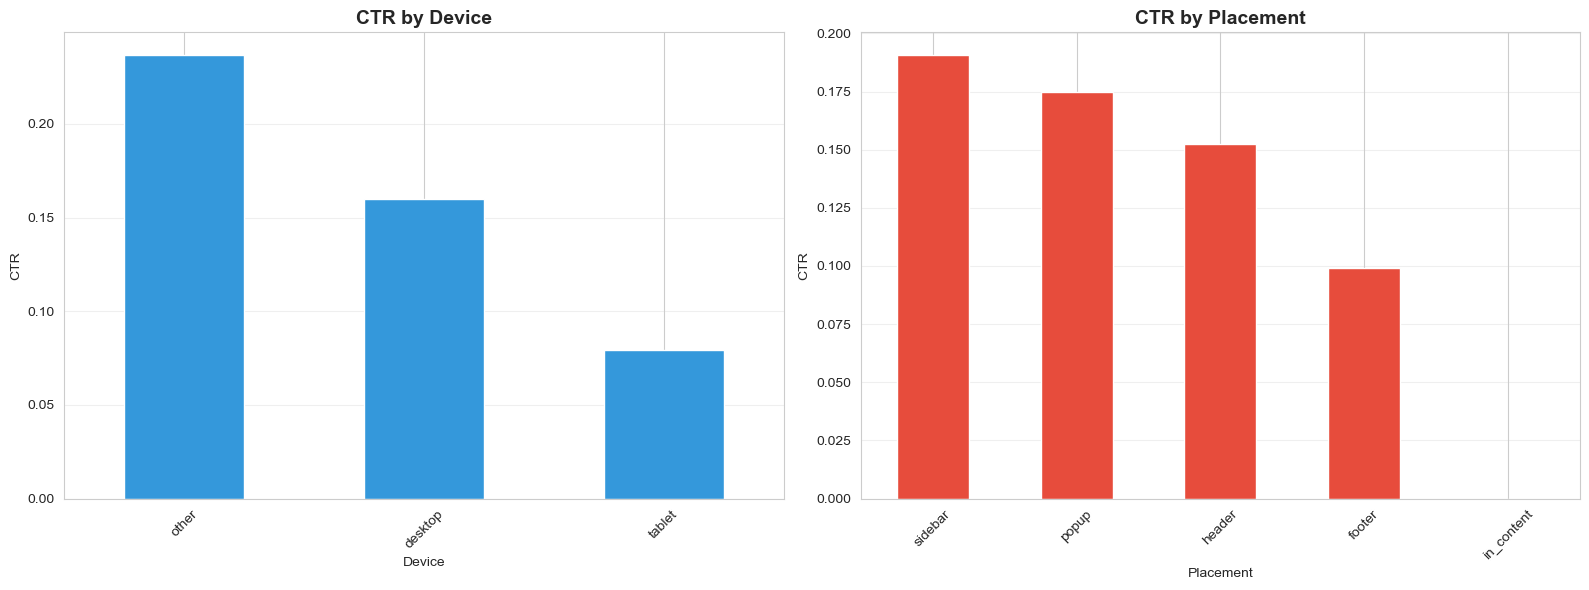

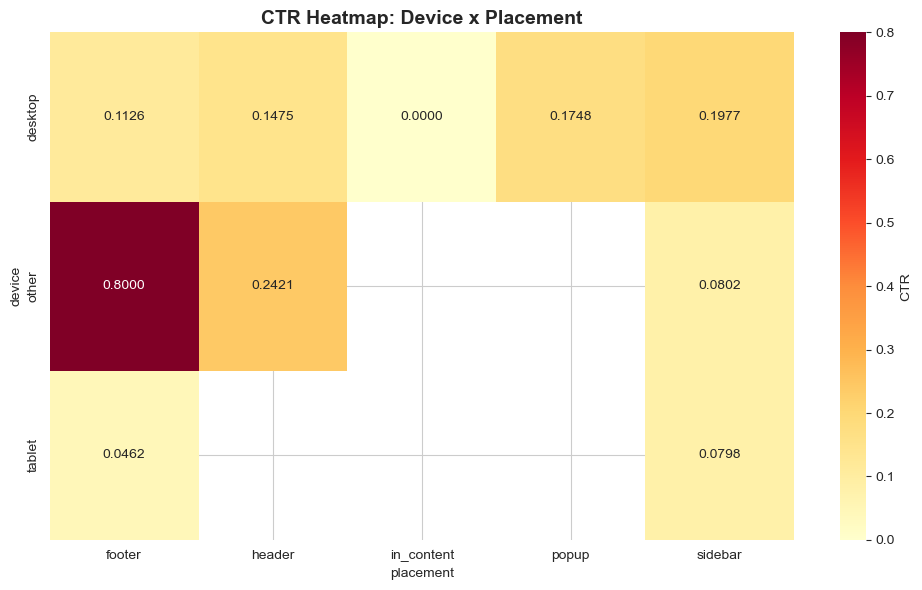

In [19]:
# Device and placement analysis using Polars
if 'df' in locals() and 'device' in df.columns and 'placement' in df.columns:
    # Device CTR
    device_ctr = df.group_by('device').agg([
        pl.col('clicked').mean().alias('ctr'),
        pl.count().alias('impressions')
    ]).sort('ctr', descending=True)
    
    print("CTR by Device:")
    print(device_ctr)
    
    # Placement CTR
    placement_ctr = df.group_by('placement').agg([
        pl.col('clicked').mean().alias('ctr'),
        pl.count().alias('impressions')
    ]).sort('ctr', descending=True)
    
    print("\nCTR by Placement:")
    print(placement_ctr)
    
    # Device x Placement interaction
    device_placement_ctr = df.group_by(['device', 'placement']).agg([
        pl.col('clicked').mean().alias('ctr')
    ]).sort('ctr', descending=True)
    
    print("\nCTR by Device x Placement:")
    print(device_placement_ctr)
    
    # Convert to pandas for visualization
    device_pd = device_ctr.to_pandas()
    placement_pd = placement_ctr.to_pandas()
    dp_pd = device_placement_ctr.to_pandas()
    
    # Plot
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Device CTR
    device_pd.plot(x='device', y='ctr', kind='bar', ax=axes[0], color='#3498db', legend=False)
    axes[0].set_title('CTR by Device', fontsize=14, fontweight='bold')
    axes[0].set_xlabel('Device')
    axes[0].set_ylabel('CTR')
    axes[0].tick_params(axis='x', rotation=45)
    axes[0].grid(True, alpha=0.3, axis='y')
    
    # Placement CTR
    placement_pd.plot(x='placement', y='ctr', kind='bar', ax=axes[1], color='#e74c3c', legend=False)
    axes[1].set_title('CTR by Placement', fontsize=14, fontweight='bold')
    axes[1].set_xlabel('Placement')
    axes[1].set_ylabel('CTR')
    axes[1].tick_params(axis='x', rotation=45)
    axes[1].grid(True, alpha=0.3, axis='y')
    
    plt.tight_layout()
    plt.show()
    
    # Heatmap
    if len(dp_pd) > 0:
        pivot_df = dp_pd.pivot(index='device', columns='placement', values='ctr')
        plt.figure(figsize=(10, 6))
        sns.heatmap(pivot_df, annot=True, fmt='.4f', cmap='YlOrRd', cbar_kws={'label': 'CTR'})
        plt.title('CTR Heatmap: Device x Placement', fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()


## Feature Statistics

Quick summary statistics for numeric features.


In [20]:
# Summary statistics using Polars
if 'df' in locals():
    # Get numeric columns
    numeric_cols = [col for col, dtype in df.schema.items() 
                   if dtype in [pl.Int8, pl.Int16, pl.Int32, pl.Int64, 
                               pl.UInt8, pl.UInt16, pl.UInt32, pl.UInt64,
                               pl.Float32, pl.Float64]]
    
    if numeric_cols:
        print(f"Numeric columns ({len(numeric_cols)}):")
        print(numeric_cols[:10], "..." if len(numeric_cols) > 10 else "")
        
        # Summary statistics
        stats = df.select(numeric_cols[:20]).describe()  # Limit to first 20 for readability
        print("\nSummary Statistics:")
        display(stats)
        
        # For full statistics, convert to pandas (if needed)
        if len(numeric_cols) > 20:
            print(f"\n(Showing first 20 columns. Total numeric columns: {len(numeric_cols)})")
            print("To see all, convert to pandas: df.select(numeric_cols).to_pandas().describe()")


Numeric columns (17):
['hour', 'day_of_week', 'is_weekend', 'clicked', 'id', 'C1', 'banner_pos', 'device_type', 'device_conn_type', 'C14'] ...

Summary Statistics:


statistic,hour,day_of_week,is_weekend,clicked,id,C1,banner_pos,device_type,device_conn_type,C14,C15,C16,C17,C18,C19,C20,C21
str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6,2.021448e6
"""null_count""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
"""mean""",4.772536,1.0,0.0,0.161637,9.2851e18,1005.010649,0.251268,1.005777,0.235075,18436.747796,318.556876,57.013661,2064.107304,1.576651,190.291222,45369.569665,68.273985
"""std""",2.596877,0.0,0.0,0.368118,5.3756e18,1.029527,0.46672,0.417239,0.694425,3769.683705,19.764245,38.750521,475.641606,1.354318,287.111145,49833.638607,41.780127
"""min""",0.0,1.0,0.0,0.0,9.9849e12,1001.0,0.0,0.0,0.0,375.0,120.0,20.0,112.0,0.0,33.0,-1.0,13.0
"""25%""",3.0,1.0,0.0,0.0,4.5273e18,1005.0,0.0,1.0,0.0,15708.0,320.0,50.0,1722.0,0.0,35.0,-1.0,43.0
"""50%""",5.0,1.0,0.0,0.0,9.4232e18,1005.0,0.0,1.0,0.0,19665.0,320.0,50.0,2201.0,2.0,39.0,-1.0,61.0
"""75%""",7.0,1.0,0.0,0.0,1.3966e19,1005.0,0.0,1.0,0.0,21611.0,320.0,50.0,2480.0,3.0,175.0,100084.0,79.0
"""max""",9.0,1.0,0.0,1.0,1.8447e19,1012.0,7.0,5.0,5.0,21763.0,1024.0,1024.0,2505.0,3.0,1835.0,100248.0,221.0


## Convert to Pandas (if needed)

If you need to use pandas-specific functions or libraries (like seaborn), convert the Polars DataFrame to pandas.


In [ ]:
# Convert Polars DataFrame to Pandas (use sparingly - uses more memory!)
# Uncomment the line below if you need pandas for specific operations

# df_pandas = df.to_pandas()
# print(f"Converted to pandas. Memory usage: {df_pandas.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

# Or use lazy evaluation for large operations
# df_lazy = pl.scan_parquet(filepath)
# result = df_lazy.filter(pl.col('clicked') == 1).group_by('device').agg([
#     pl.count().alias('clicks')
# ]).collect()
